In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# JSON 메타데이터 EDA 실험

In [4]:
import json
from pathlib import Path

In [6]:
path_json='D:/ex/최종프로젝트/aihub/감정복합영상/데이터/labels/'
path_img='D:/ex/최종프로젝트/aihub/감정복합영상/데이터/'

In [7]:
with open(path_json+'기쁨_sampled.json') as f:
    data = json.load(f)

In [9]:
df = pd.json_normalize(data)

In [10]:
df.columns

Index(['filename', 'gender', 'age', 'isProf', 'faceExp_uploader',
       'bg_uploader', 'annot_A.boxes.maxX', 'annot_A.boxes.maxY',
       'annot_A.boxes.minX', 'annot_A.boxes.minY', 'annot_A.faceExp',
       'annot_A.bg', 'annot_B.boxes.maxX', 'annot_B.boxes.maxY',
       'annot_B.boxes.minX', 'annot_B.boxes.minY', 'annot_B.faceExp',
       'annot_B.bg', 'annot_C.boxes.maxX', 'annot_C.boxes.maxY',
       'annot_C.boxes.minX', 'annot_C.boxes.minY', 'annot_C.faceExp',
       'annot_C.bg'],
      dtype='object')

In [11]:
df.describe()

,age,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,26.697819,1929.148843,1557.340915,1120.290193,477.642137,1930.982334,1566.478577,1124.167607,474.868777,1924.790819,1557.117052,1117.026649,470.207933
std,7.603389,575.419106,367.552095,484.000991,238.251362,575.573468,368.705403,484.598728,237.937774,588.906415,379.508593,491.662429,240.894289
min,10.000000,442.966082,629.449599,27.080239,-285.629714,448.805082,634.291599,23.119239,-298.746714,-356.865356,-167.019667,-356.865356,-286.524715
25%,20.000000,1577.113800,1368.820300,804.363951,325.637686,1577.113800,1380.592369,819.106930,335.846340,1577.045800,1374.204600,801.029600,316.991529
50%,30.000000,1903.332754,1541.661500,1089.423300,464.704770,1892.410200,1559.333457,1097.342408,454.802881,1892.410200,1547.552000,1099.412200,456.841395
75%,30.000000,2243.564787,1713.096985,1406.819300,593.005070,2254.456037,1729.595908,1410.773394,588.064216,2247.154000,1723.460400,1414.173729,579.503300
max,50.000000,5053.851809,3361.697648,3416.269573,1219.917400,5066.915249,3385.220537,3455.775170,1501.944840,5052.363144,3327.211803,3489.462229,1288.206366


In [12]:
df['age'].value_counts()

age
20    156
30    116
40     44
50      4
10      1
Name: count, dtype: int64

In [13]:
def calc_bbox_stats(df, prefix):
    df[f"{prefix}_width"] = df[f"{prefix}.boxes.maxX"] - df[f"{prefix}.boxes.minX"]
    df[f"{prefix}_height"] = df[f"{prefix}.boxes.maxY"] - df[f"{prefix}.boxes.minY"]
    df[f"{prefix}_area"] = df[f"{prefix}_width"] * df[f"{prefix}_height"]
    df[f"{prefix}_aspect_ratio"] = df[f"{prefix}_width"] / df[f"{prefix}_height"]
    return df

In [14]:
for annot in ["annot_A", "annot_B", "annot_C"]:
    df = calc_bbox_stats(df, annot)

In [15]:
print(df[[col for col in df.columns if "width" in col or "height" in col or "aspect_ratio" in col]].describe())

       annot_A_width  annot_A_height  annot_A_aspect_ratio  annot_B_width  \
count     321.000000      321.000000            321.000000     321.000000   
mean      808.858650     1079.698778              0.753347     806.814727   
std       176.120155      249.723441              0.059383     178.031089   
min       314.420910      412.959240              0.620645     316.482910   
25%       728.130065      955.906760              0.714042     731.888510   
50%       806.736783     1067.766250              0.744411     800.498469   
75%       891.690500     1211.542770              0.779913     891.808158   
max      1637.582236     2370.428908              1.045296    1673.963470   

       annot_B_height  annot_B_aspect_ratio  annot_C_width  annot_C_height  \
count      321.000000            321.000000     321.000000      321.000000   
mean      1091.609800              0.743128     807.764170     1086.909119   
std        256.080035              0.061685     183.169687      254.8384

In [27]:
df[df["annot_C_aspect_ratio"].isna()].iloc[:,7:24]

,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,annot_A.faceExp,annot_A.bg,annot_B.boxes.maxX,annot_B.boxes.maxY,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
19,1509.754317,739.407595,345.530028,기쁨,숙박 및 거주공간,1615.265789,1531.073684,737.876316,351.536842,기쁨,숙박 및 거주공간,-356.865356,-167.019667,-356.865356,-167.019667,기쁨,숙박 및 거주공간


In [19]:
df[df["annot_C_aspect_ratio"].isna()][['annot_C.boxes.maxX','annot_C.boxes.maxY']]


,annot_C.boxes.maxX,annot_C.boxes.maxY
19,-356.865356,-167.019667


In [20]:
df.columns

Index(['filename', 'gender', 'age', 'isProf', 'faceExp_uploader',
       'bg_uploader', 'annot_A.boxes.maxX', 'annot_A.boxes.maxY',
       'annot_A.boxes.minX', 'annot_A.boxes.minY', 'annot_A.faceExp',
       'annot_A.bg', 'annot_B.boxes.maxX', 'annot_B.boxes.maxY',
       'annot_B.boxes.minX', 'annot_B.boxes.minY', 'annot_B.faceExp',
       'annot_B.bg', 'annot_C.boxes.maxX', 'annot_C.boxes.maxY',
       'annot_C.boxes.minX', 'annot_C.boxes.minY', 'annot_C.faceExp',
       'annot_C.bg', 'annot_A_width', 'annot_A_height', 'annot_A_area',
       'annot_A_aspect_ratio', 'annot_B_width', 'annot_B_height',
       'annot_B_area', 'annot_B_aspect_ratio', 'annot_C_width',
       'annot_C_height', 'annot_C_area', 'annot_C_aspect_ratio'],
      dtype='object')

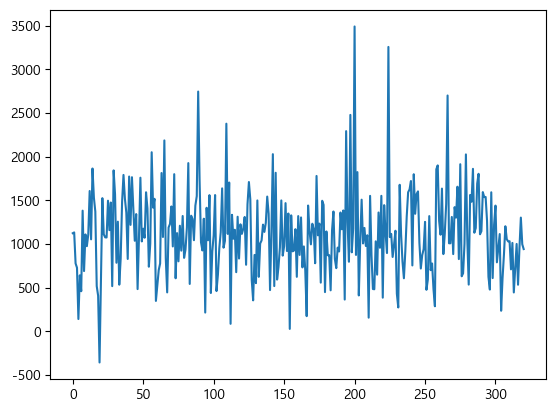

In [22]:
plt.plot(df['annot_C.boxes.minX'])

### C만 오기입/데이터 오염으로 예상되는 음수 바운딩박스/중복기입 확인

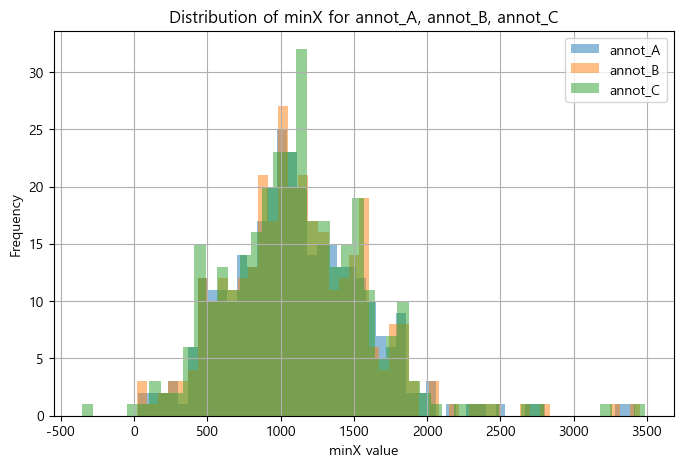

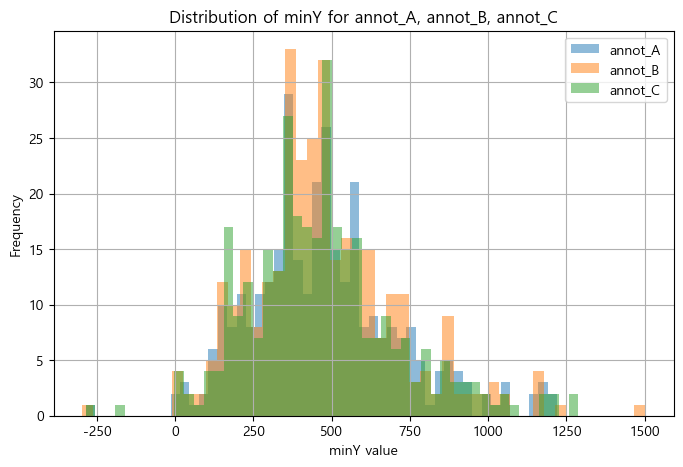

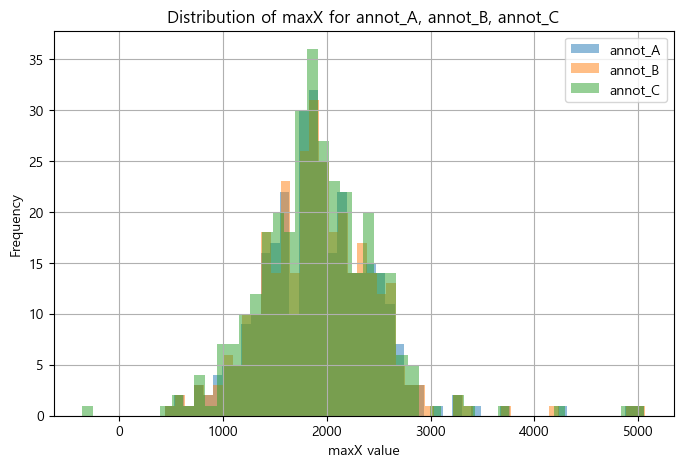

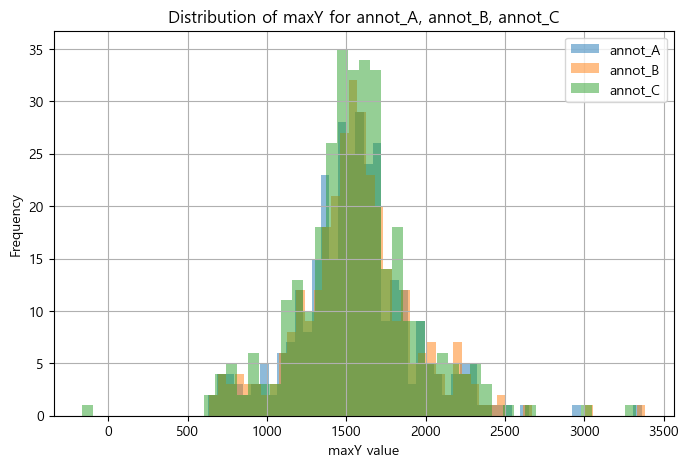

In [28]:
import matplotlib.pyplot as plt

# 분석할 좌표 키
coords = ["minX", "minY", "maxX", "maxY"]

for coord in coords:
    plt.figure(figsize=(8, 5))
    
    for annot in ["annot_A", "annot_B", "annot_C"]:
        col = f"{annot}.boxes.{coord}"
        plt.hist(df[col], bins=50, alpha=0.5, label=annot)
    
    plt.xlabel(f"{coord} value")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {coord} for annot_A, annot_B, annot_C")
    plt.legend()
    plt.grid(True)
    plt.show()


In [31]:
print('음수인 데이터의 개수')
for coord in ["minX", "minY", "maxX", "maxY"]:
    for annot in ["annot_A", "annot_B", "annot_C"]:
        col = f"{annot}.boxes.{coord}"
        if "min" in coord:
            bad_rows = df[df[col] < 0]
        # else:
            # maxX, maxY는 이미지 크기 비교 필요
            # bad_rows = df[df[col] > IMAGE_DIM_LIMIT]  # 추후 실제 이미지 크기와 비교
        print(coord, annot, len(bad_rows))

음수인 데이터의 개수
minX annot_A 0
minX annot_B 0
minX annot_C 1
minY annot_A 1
minY annot_B 1
minY annot_C 2
maxX annot_A 2
maxX annot_B 2
maxX annot_C 2
maxY annot_A 2
maxY annot_B 2
maxY annot_C 2


일반적인 정형 EDA와 크게 다르지 않음. 결측치, 바운딩박스, 분류별 분포 등 기술통계 위주면 충분할 것

# 이미지 EDA

In [32]:
from PIL import Image
import cv2
from pathlib import Path

In [33]:
img_dir = Path(path_img+"기쁨")

## 이미지 변수화, 파일사이즈와 채널, rgb 통계 포함

In [38]:
rows = []

In [39]:
def to_rgb(img: Image.Image) -> Image.Image:
    # 원본 모드 유지하다가 통계 계산 시에만 RGB로 변환
    if img.mode == "RGB":
        return img
    return img.convert("RGB")

In [40]:
for p in img_dir.glob("*.jpg"):
    # --- 로드 ---
    img_orig = Image.open(p)               # 원본 모드 유지
    img_rgb = to_rgb(img_orig)             # 통계/품질 계산용
    np_rgb = np.asarray(img_rgb, dtype=np.float32)  # (H,W,3), 0~255

    # --- 메타 ---
    w, h = img_orig.size
    mode = img_orig.mode
    fsize_kb = p.stat().st_size / 1024.0

    # --- 채널 평균/표준편차 ---
    # 채널 통계는 그대로 RGB 기준(근사치)
    r_mean, g_mean, b_mean = np_rgb.mean(axis=(0,1))
    r_std,  g_std,  b_std  = np_rgb.std(axis=(0,1))

    # --- 휘도 기반 밝기/대비 ---
    # sRGB/Rec.709 가중치, 0~255 스케일
    Y = 0.2126*np_rgb[:,:,0] + 0.7152*np_rgb[:,:,1] + 0.0722*np_rgb[:,:,2]
    brightness = float(Y.mean())   # 밝기
    contrast   = float(Y.std())    # 대비

    # --- 선명도 (Laplacian variance on luminance) ---
    Y_u8 = Y.astype(np.uint8)
    sharpness = float(cv2.Laplacian(Y_u8, cv2.CV_64F).var())

    rows.append({
        "filename": p.name,
        "width": w, "height": h,
        "mode": mode, "file_size_kb": fsize_kb,
        "r_mean": r_mean, "g_mean": g_mean, "b_mean": b_mean,
        "r_std": r_std,   "g_std": g_std,   "b_std": b_std,
        "brightness_Y": brightness,
        "contrast_Y": contrast,
        "sharpness_lapvar": sharpness,
    })

In [41]:
df_quality = pd.DataFrame(rows)

In [43]:
df_quality.describe(include="all")

,filename,width,height,mode,file_size_kb,r_mean,g_mean,b_mean,r_std,g_std,b_std,brightness_Y,contrast_Y,sharpness_lapvar
count,315,315.000000,315.000000,315,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
unique,315,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,007f299267a9d6a145f627e9993aeae4e8323652785a2f...,NaN,NaN,RGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3155.361905,2217.050794,NaN,1954.019813,129.314774,120.976311,113.641418,65.356827,63.364708,61.764751,122.663425,63.139636,140.145302
std,NaN,696.811722,528.733143,NaN,1259.170833,22.191158,22.458736,24.299372,9.230221,9.544147,10.078526,22.114013,9.313373,165.687762
min,NaN,1330.000000,1000.000000,NaN,277.070312,56.253853,42.503609,47.009411,37.325882,38.844296,32.757206,46.402988,38.346558,4.613802
25%,NaN,2944.000000,1980.000000,NaN,1220.174316,116.925339,107.699604,97.688992,59.050167,56.481997,54.891924,109.766178,56.330252,44.412993
50%,NaN,3088.000000,2316.000000,NaN,1638.633789,130.411011,121.195534,113.341301,66.104500,63.776688,62.158298,122.799316,63.695122,78.842275
75%,NaN,3264.000000,2448.000000,NaN,2209.740723,144.384972,135.586159,130.270798,71.462643,69.604275,68.673805,136.942650,69.135941,156.235388


In [45]:
import seaborn as sns

In [46]:
# 분석할 컬럼
metrics = ["width", "height", "brightness_Y", "contrast_Y", "sharpness_lapvar", "file_size_kb"]


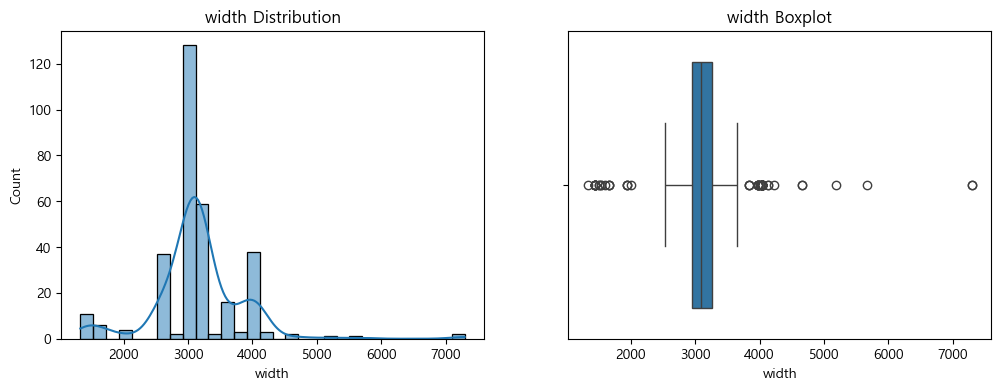


--- width 극단치 ---
하위 5% (1656.00 이하)
                                             filename  width
20  0cebc58b878df61c71de8e92bf181af059fe272b432e0f...   1500
44  1251f42f454343b9636a12bab0943ec6f25f63c3b30a5b...   1440
45  1333cafab719265959604513c5beb1763328df42a8daee...   1440
90  2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402...   1656
91  2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402...   1656

상위 5% (4032.00 이상)
                                             filename  width
0   007f299267a9d6a145f627e9993aeae4e8323652785a2f...   4032
3   033de467a2d107ce2004c41451b69ba93196a4e1fe423f...   5664
4   03f84d01e35a8d2beed4c9467a82c212daa05809d0bc98...   4032
19  0b33836b914f544c31e3a642ccccbb94114040537440b4...   4032
51  1ac0331132346c7900a8dd6f84638e1f5115be2b8040ac...   4032


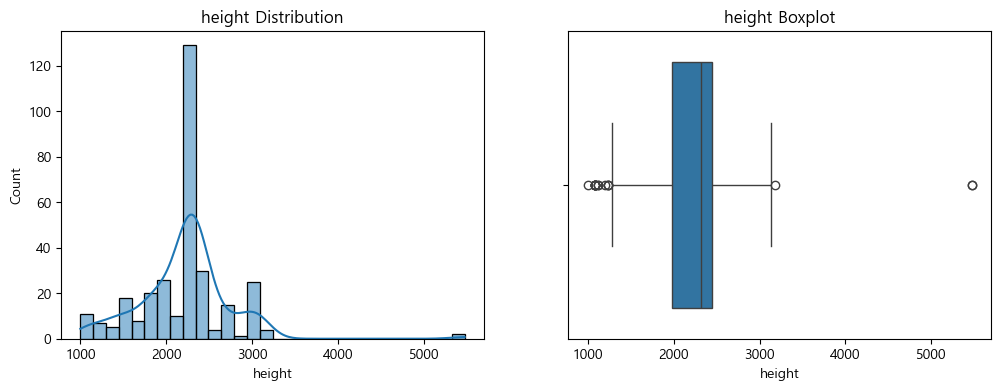


--- height 극단치 ---
하위 5% (1288.00 이하)
                                             filename  height
20  0cebc58b878df61c71de8e92bf181af059fe272b432e0f...    1124
44  1251f42f454343b9636a12bab0943ec6f25f63c3b30a5b...    1080
45  1333cafab719265959604513c5beb1763328df42a8daee...    1080
90  2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402...    1242
91  2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402...    1242

상위 5% (3024.00 이상)
                                             filename  height
0   007f299267a9d6a145f627e9993aeae4e8323652785a2f...    3024
3   033de467a2d107ce2004c41451b69ba93196a4e1fe423f...    3184
62  1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46...    3024
66  22f17e41dedf8cb19d76cae91e9bbb090c8b1161c71677...    3024
76  2aafb545c9a93c39542e483186fe25fe1cb3709a9b8d02...    3024


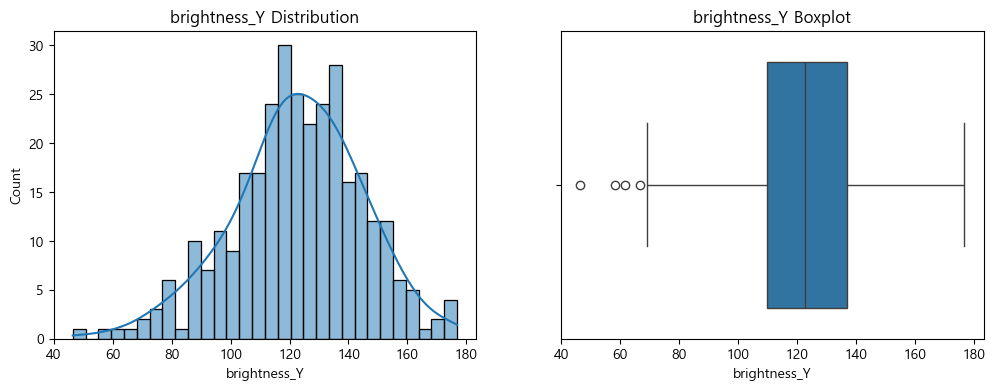


--- brightness_Y 극단치 ---
하위 5% (85.27 이하)
                                              filename  brightness_Y
47   1390b9047d3a88faa51129a0bd5cad373cfa1731f85c01...     66.862328
73   2a3884fb335989165828041395bcbd9fea25a70d93a84f...     78.668480
75   2a3884fb335989165828041395bcbd9fea25a70d93a84f...     73.032501
97   33baf31f61241358f6898cfa7e3262bf409725c44caf6f...     80.970062
104  36fad6225777ee5c237fbe64e3dec1e15f35a72f6abf2f...     82.949867

상위 5% (158.47 이상)
                                              filename  brightness_Y
13   08c0d9389dbc222023035a3ef6ad78ff04b107aa756b0c...    164.979691
33   0ebaf6bd7d220a448bf362409d38d6fcd7c2de1e84a960...    161.445587
79   2af87d1494bfd574b71bfdc61829e8fa45862115cbce2b...    168.765274
111  3a6bfd5a281e4b62b1135a59f81d7179286c47a44c164d...    158.533386
154  52e29f796b54c05d9121034a6f92047a5a3e70b63d5592...    174.896606


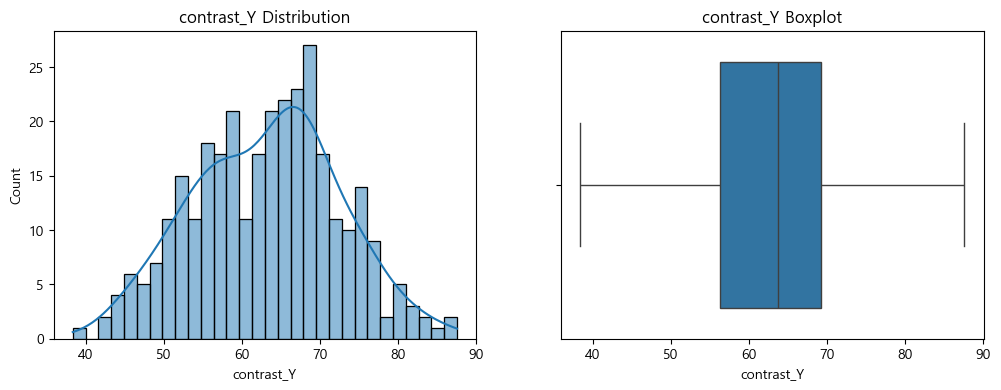


--- contrast_Y 극단치 ---
하위 5% (47.64 이하)
                                              filename  contrast_Y
29   0d907746925fb35712cca733630efe057352a022c5af57...   46.089081
47   1390b9047d3a88faa51129a0bd5cad373cfa1731f85c01...   45.620289
60   1f471a887cb5b230051f710ce1536209d479737748a116...   44.079895
160  559fa2f1d759bf4567906aba12d64a29b730535f6ea0a0...   47.593361
176  594dacbd3025e16f23c254ced38682ee4fe0d705950439...   42.068100

상위 5% (77.67 이상)
                                              filename  contrast_Y
46   1333cafab719265959604513c5beb1763328df42a8daee...   79.725410
61   1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46...   77.866844
77   2aafb545c9a93c39542e483186fe25fe1cb3709a9b8d02...   87.547241
100  36a039e4b1f83816b280a18a8cd98b5f663d594bbf3e74...   80.751732
102  36f3d025faf2e87a1c5e83c4b5c36964d2c80fb29a1d29...   87.272598


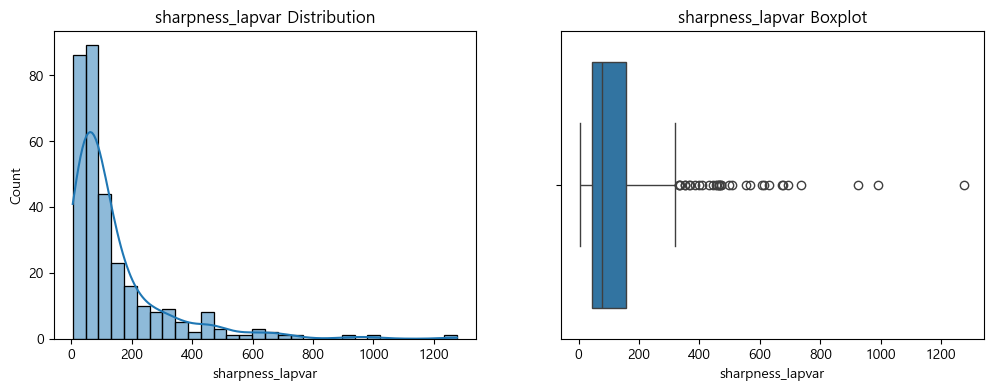


--- sharpness_lapvar 극단치 ---
하위 5% (22.74 이하)
                                             filename  sharpness_lapvar
3   033de467a2d107ce2004c41451b69ba93196a4e1fe423f...          4.613802
26  0d907746925fb35712cca733630efe057352a022c5af57...         15.645678
27  0d907746925fb35712cca733630efe057352a022c5af57...         22.314776
40  1028c584386db9c7239e2ad7bf7c53d671e32769235aa9...         19.067071
62  1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46...         22.615462

상위 5% (467.28 이상)
                                             filename  sharpness_lapvar
11  08a32c1632b7dff63981271350669d8b39d567a5db78da...       1276.566000
17  0a88a23fd9e2225216ed0ab0e2c1d01801be2e23b1f916...        925.054804
51  1ac0331132346c7900a8dd6f84638e1f5115be2b8040ac...        506.530649
61  1f643b75974d8e74fd071cfdf8553bf651a75d5d213f46...        737.163775
76  2aafb545c9a93c39542e483186fe25fe1cb3709a9b8d02...        567.292268


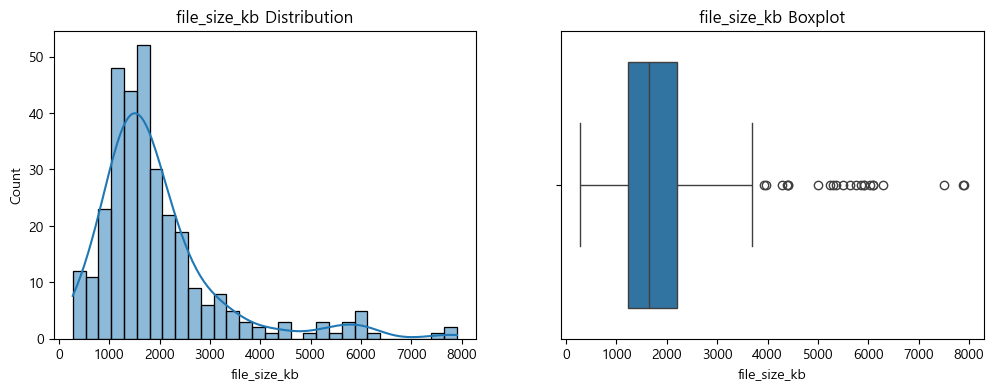


--- file_size_kb 극단치 ---
하위 5% (595.47 이하)
                                             filename  file_size_kb
20  0cebc58b878df61c71de8e92bf181af059fe272b432e0f...    386.921875
44  1251f42f454343b9636a12bab0943ec6f25f63c3b30a5b...    427.006836
45  1333cafab719265959604513c5beb1763328df42a8daee...    393.606445
90  2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402...    463.389648
91  2f56effc820a986f83fb41b5e75be3a8c15bc27ed27402...    418.720703

상위 5% (5075.69 이상)
                                              filename  file_size_kb
66   22f17e41dedf8cb19d76cae91e9bbb090c8b1161c71677...   5355.695312
135  478b7927e1e55c0fb029e03f5b703a07200b551c7d7ad6...   5907.629883
171  58b63f6c4872a169ca2c4a60fafff9b3d0a108e0e5002f...   5639.638672
172  58b63f6c4872a169ca2c4a60fafff9b3d0a108e0e5002f...   5306.118164
173  58dc739379422eab32414c2f65bd157d08a1e564ee6763...   7497.678711


In [47]:
for m in metrics:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # 히스토그램 + KDE
    sns.histplot(df_quality[m], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"{m} Distribution")
    
    # 박스플롯
    sns.boxplot(x=df_quality[m], ax=axes[1])
    axes[1].set_title(f"{m} Boxplot")
    
    plt.show()

    # 극단치 확인 (하위 5%, 상위 5%)
    lower_thresh = np.percentile(df_quality[m], 5)
    upper_thresh = np.percentile(df_quality[m], 95)

    print(f"\n--- {m} 극단치 ---")
    print(f"하위 5% ({lower_thresh:.2f} 이하)")
    print(df_quality[df_quality[m] <= lower_thresh][["filename", m]].head())

    print(f"\n상위 5% ({upper_thresh:.2f} 이상)")
    print(df_quality[df_quality[m] >= upper_thresh][["filename", m]].head())

### 해석
1. 해상도, 파일크기: 1000x1000에서 7000x5000까지 다양한 해상도와 4~7메가급 이미지도 다수. 
- 선처리를 해줘야 서버 저장소 확보와 메모리 사용량에 도움이 될 것
- 품질 조정에 비례한 성능 차이에 대한 실험 내용 필요함

2. 밝기, 대비: 범위 40에서 180까지도 혼재, 120 이상이 중앙값
- 휘도 분포 표준화?
- 이거 또한 bbox내부로 파악할 필요있는 듯
- 저대비 저명도 이미지는 인식확률을 위한 기준 필요할 듯

3. 선명도: 배경이 포함되어 있어서 거의 무의미. 얼굴에다가만 해야될듯.


# 이미지+JSON: bbox 품질 검사, 이미지 전체에 대한 탐사

In [ ]:
import random, math

In [ ]:
img_dir = Path("D:/ex/최종프로젝트/aihub/감정복합영상/데이터/기쁨")
out_dir = Path("./out_vis_cv2"); out_dir.mkdir(exist_ok=True)
out_dir.mkdir(parents=True, exist_ok=True)

SAMPLE_SIZE = 2
SEED = 42

In [64]:
# 1) 컬럼명에서 '.'를 '_'로 바꿔주기
df2 = df.copy() #원본 억지 보존..
df2.columns = [c.replace('.', '_') for c in df2.columns]

ANN_KEYS = {
    "A": ("annot_A_boxes_minX","annot_A_boxes_minY","annot_A_boxes_maxX","annot_A_boxes_maxY","annot_A_faceExp"),
    "B": ("annot_B_boxes_minX","annot_B_boxes_minY","annot_B_boxes_maxX","annot_B_boxes_maxY","annot_B_faceExp"),
    "C": ("annot_C_boxes_minX","annot_C_boxes_minY","annot_C_boxes_maxX","annot_C_boxes_maxY","annot_C_faceExp"),
}


In [72]:
from pathlib import Path
import random
import cv2
import pandas as pd

img_dir = Path("D:/ex/최종프로젝트/aihub/감정복합영상/데이터/기쁨")
out_dir = Path("./out_vis_cv2"); out_dir.mkdir(exist_ok=True)

# (택1) 위에서 말한 컬럼명 치환 적용 후:
# df.columns = [c.replace('.', '_') for c in df.columns]
# ANN_KEYS = {...치환된 이름...}

ANN_KEYS = {
    "A": ("annot_A.boxes.minX","annot_A.boxes.minY","annot_A.boxes.maxX","annot_A.boxes.maxY","annot_A.faceExp"),
    "B": ("annot_B.boxes.minX","annot_B.boxes.minY","annot_B.boxes.maxX","annot_B.boxes.maxY","annot_B.faceExp"),
    "C": ("annot_C.boxes.minX","annot_C.boxes.minY","annot_C.boxes.maxX","annot_C.boxes.maxY","annot_C.faceExp"),
}
COLORS = {"A": (60,60,255), "B": (60,200,60), "C": (255,160,60)}  # BGR!

def clamp(x1,y1,x2,y2,W,H):
    x1 = max(0, min(W-1, int(round(x1))))
    y1 = max(0, min(H-1, int(round(y1))))
    x2 = max(0, min(W-1, int(round(x2))))
    y2 = max(0, min(H-1, int(round(y2))))
    if x2 < x1: x1, x2 = x2, x1
    if y2 < y1: y1, y2 = y2, y1
    return x1,y1,x2,y2

# filename → 해당 row 한 줄 매핑(중복 없다고 가정)
row_map = {row["filename"]: row for _, row in df.iterrows()}

all_imgs = sorted([p for p in img_dir.glob("*.jpg") if p.name in row_map])
sample = random.sample(all_imgs, k=min(35, len(all_imgs)))

drawn, skipped = 0, 0
for p in sample:
    row = row_map[p.name]
    img = cv2.imread(str(p))
    if img is None:
        print("read fail:", p); skipped += 1; continue
    H, W = img.shape[:2]

    drew_any = False
    for tag, (kx1,ky1,kx2,ky2,kexp) in ANN_KEYS.items():
        try:
            x1, y1 = float(row[kx1]), float(row[ky1])
            x2, y2 = float(row[kx2]), float(row[ky2])
        except Exception:
            continue
        if pd.isna(x1) or pd.isna(y1) or pd.isna(x2) or pd.isna(y2):
            continue
        x1,y1,x2,y2 = clamp(x1,y1,x2,y2,W,H)
        if x2-x1 <= 0 or y2-y1 <= 0: 
            continue

        cv2.rectangle(img, (x1,y1), (x2,y2), COLORS[tag], 2)
        label = f"{tag}:{row.get(kexp, '')}"
        cv2.putText(img, label, (x1, max(0,y1-6)), cv2.FONT_HERSHEY_SIMPLEX, 0.55, COLORS[tag], 2, cv2.LINE_AA)
        drew_any = True

    cv2.imwrite(str(out_dir / p.name), img)
    drawn += int(drew_any)

print(f"[DONE] saved {len(sample)} imgs, drawn_on={drawn}, skipped={skipped}, out={out_dir}")


[DONE] saved 35 imgs, drawn_on=35, skipped=0, out=out_vis_cv2
